In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load and save the data into variable
df = pd.read_csv('heart.csv')

In [3]:
# Print the data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,temp,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,98.4,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,97.7,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,94.2,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,97.1,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,97.4,1,3,2,0


In [4]:
# Get data types
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
temp        float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [5]:
# Get the shape of the data
df.shape

(1025, 15)

In [6]:
# Removing columns
list_drop = ['cp', 'chol', 'fbs', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
df.drop(list_drop, axis=1, inplace=True)

In [7]:
# Print the data after removing columns
df.head()

,age,sex,trestbps,restecg,thalach,temp,target
0,52,1,125,1,168,98.4,0
1,53,1,140,0,155,97.7,0
2,70,1,145,1,125,94.2,0
3,61,1,148,1,161,97.1,0
4,62,0,138,1,106,97.4,0


In [8]:
# Find a duplicate rows in dataset
duplicate_data_rows = df[df.duplicated(keep='first')]
print(duplicate_data_rows)

      age  sex  trestbps  restecg  thalach  temp  target
112    48    1       130        0      150  97.1       0
121    44    1       120        1      144  97.9       0
180    63    1       140        0      144  97.9       0
206    59    1       126        1      134  98.1       0
229    66    0       178        1      165  98.6       0
...   ...  ...       ...      ...      ...   ...     ...
1005   55    0       128        2      130  98.2       0
1010   51    1       140        1      173  98.3       0
1013   58    1       114        2      140  96.3       0
1017   53    1       123        1       95  98.6       0
1024   54    1       120        1      113  97.8       0

[76 rows x 7 columns]


In [9]:
# Drop duplicate rows in dataset
new_df = df.drop_duplicates(keep='first')
new_df.reset_index(inplace=True)
del new_df['index']
new_df.shape

(949, 7)

In [10]:
# Print dataset
new_df

,age,sex,trestbps,restecg,thalach,temp,target
0,52,1,125,1,168,98.4,0
1,53,1,140,0,155,97.7,0
2,70,1,145,1,125,94.2,0
3,61,1,148,1,161,97.1,0
4,62,0,138,1,106,97.4,0
...,...,...,...,...,...,...,...
944,47,1,112,1,143,91.8,1
945,59,1,140,1,164,95.0,1
946,60,1,125,0,141,99.1,0
947,47,1,110,0,118,98.2,0


In [11]:
# Count the empty values in each column in dataset
new_df.isna().sum()

age         0
sex         0
trestbps    0
restecg     0
thalach     0
temp        0
target      0
dtype: int64

In [12]:
# View basic statistics
new_df.describe()

,age,sex,trestbps,restecg,thalach,temp,target
count,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000
mean,54.344573,0.689146,131.485774,0.530032,149.453109,95.235827,0.543730
std,9.113115,0.463087,17.364820,0.526106,23.059617,2.912950,0.498347
min,29.000000,0.000000,94.000000,0.000000,71.000000,89.000000,0.000000
25%,47.000000,0.000000,120.000000,0.000000,132.000000,92.800000,0.000000
50%,56.000000,1.000000,130.000000,1.000000,152.000000,96.200000,1.000000
75%,61.000000,1.000000,140.000000,1.000000,167.000000,97.900000,1.000000
max,77.000000,1.000000,200.000000,2.000000,202.000000,100.400000,1.000000


<AxesSubplot:xlabel='target', ylabel='count'>

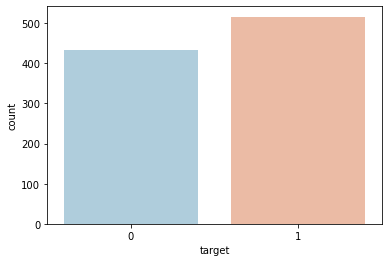

In [13]:
# Visualize the count of the number of patients with a heart disease and without.
sns.countplot(x = 'target', data = new_df, palette = 'RdBu_r')

In [14]:
# Get the correlation in data set.
new_df.corr()

,age,sex,trestbps,restecg,thalach,temp,target
age,1.000000,-0.089072,0.267728,-0.122179,-0.398334,0.172147,-0.226417
sex,-0.089072,1.000000,-0.070665,-0.059060,-0.042608,0.344907,-0.290705
trestbps,0.267728,-0.070665,1.000000,-0.109847,-0.053627,0.107981,-0.141967
restecg,-0.122179,-0.059060,-0.109847,1.000000,0.052264,-0.112278,0.142844
thalach,-0.398334,-0.042608,-0.053627,0.052264,1.000000,-0.293242,0.434014
temp,0.172147,0.344907,0.107981,-0.112278,-0.293242,1.000000,-0.796620
target,-0.226417,-0.290705,-0.141967,0.142844,0.434014,-0.796620,1.000000


<AxesSubplot:>

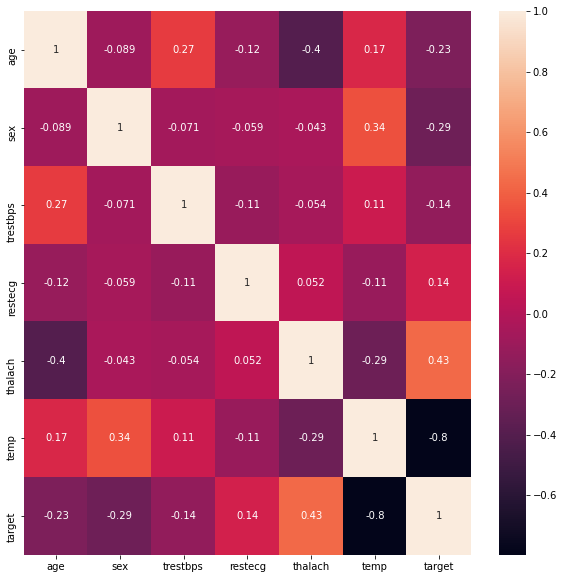

In [15]:
# Get correlations of each features in dataset
corr_relationsmat = new_df.corr()
top_corr_relations_features = corr_relationsmat.index
plt.figure(figsize=(10,10))

# Visualize the data
sns.heatmap(new_df[top_corr_relations_features].corr(), annot=True)

In [16]:
# Spit into feature data and target data.
X = new_df.loc[:, new_df.columns != 'target']
Y = new_df['target']

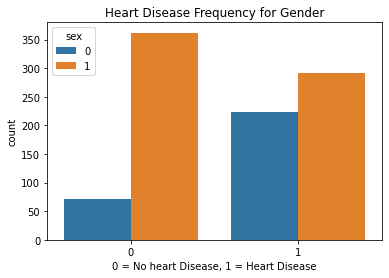

In [17]:
# Check number of heart attacks compared to gender:
sns.countplot(x = 'target', data = new_df, hue = 'sex')
plt.title("Heart Disease Frequency for Gender")
plt.xlabel("0 = No heart Disease, 1 = Heart Disease");

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>,
        <AxesSubplot:title={'center':'temp'}>],
       [<AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

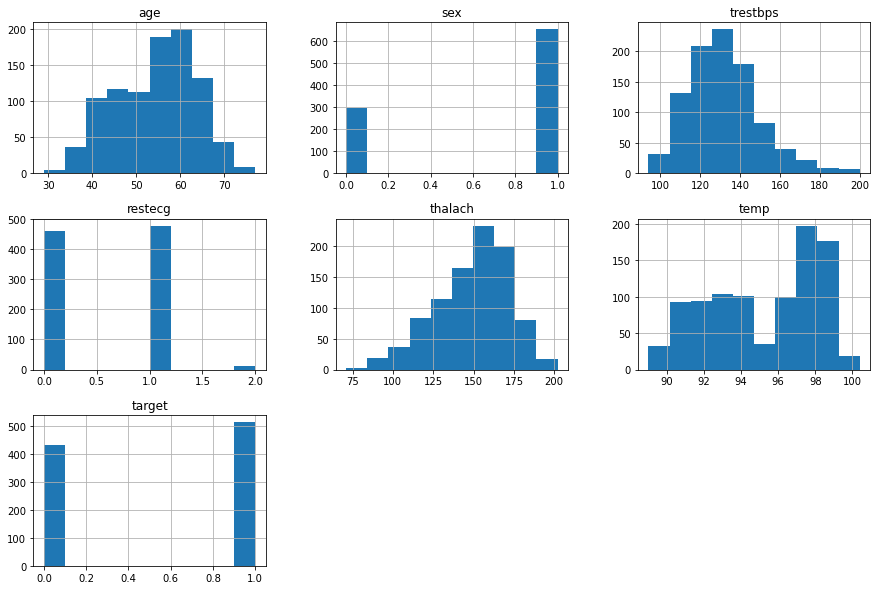

In [18]:
# Creating Histograms for dataset
new_df.hist(figsize=(15,10))

In [19]:
# Split into 80% training data and 20% testing dataset.
from sklearn.model_selection import train_test_split
X_train_dataset, X_test_dataset, Y_train_dataset, Y_test_dataset = train_test_split(X, Y, test_size= 0.20, random_state = 1)

In [20]:
# Use RandomForestClassifier.
from sklearn.ensemble import RandomForestClassifier
randomForestClassifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 1)

# Fit model on training data
randomForestClassifier.fit(X_train_dataset, Y_train_dataset)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1)

In [21]:
from sklearn.metrics import accuracy_score
# Test the models accuracy on the data set.
heart_attack_random_forest_model = randomForestClassifier

# Predict accuracy
Y_dataset_rf_accuracy = heart_attack_random_forest_model.predict(X_test_dataset)
model_accuracy_score_rf = round(accuracy_score(Y_dataset_rf_accuracy, Y_test_dataset) * 100 , 2)

# Print Model test Accuracy
print("Model Test Accuracy: " + str(model_accuracy_score_rf)+" %")

Model Test Accuracy: 91.05 %


In [22]:
import joblib
# Save model in 'IdentifyHeartAttackModel' directory
joblib.dump(heart_attack_random_forest_model,'./IdentifyHeartAttackModel/identify_heart_attack_randomforest_model.joblib')

['./IdentifyHeartAttackModel/identify_heart_attack_randomforest_model.joblib']